In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
# Load the dataset
data = pd.read_csv("/content/train.csv")

# Display first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Basic statistics for numeric columns
print(data.describe())


   index  beer/ABV  beer/beerId  beer/brewerId                  beer/name  \
0  40163       5.0        46634          14338                   Chiostro   
1   8135      11.0         3003            395   Bearded Pat's Barleywine   
2  10529       4.7          961            365       Naughty Nellie's Ale   
3  44610       4.4          429              1            Pilsner Urquell   
4  37062       4.4         4904           1417  Black Sheep Ale (Special)   

                beer/style  review/appearance  review/aroma  review/overall  \
0     Herbed / Spiced Beer                4.0           4.0             4.0   
1      American Barleywine                4.0           3.5             3.5   
2  American Pale Ale (APA)                3.5           4.0             3.5   
3           Czech Pilsener                3.0           3.0             2.5   
4         English Pale Ale                4.0           3.0             3.0   

   review/palate  review/taste  \
0            4.0           4

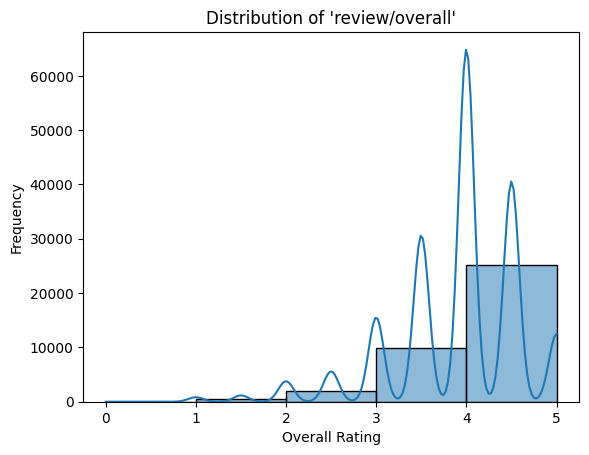

In [6]:
# Plot distribution of 'review/overall'
sns.histplot(data['review/overall'], bins=5, kde=True)
plt.title("Distribution of 'review/overall'")
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.show()


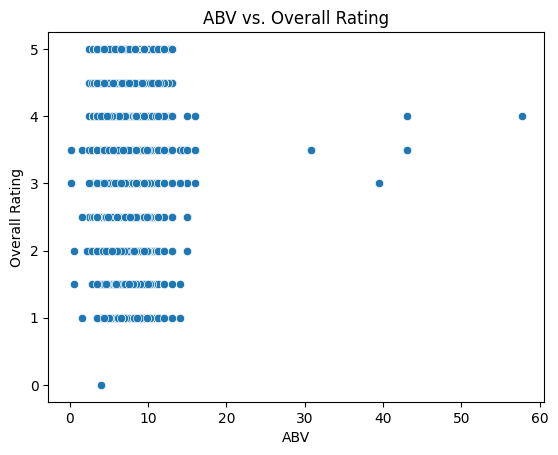

In [7]:
sns.scatterplot(x='beer/ABV', y='review/overall', data=data)
plt.title("ABV vs. Overall Rating")
plt.xlabel("ABV")
plt.ylabel("Overall Rating")
plt.show()


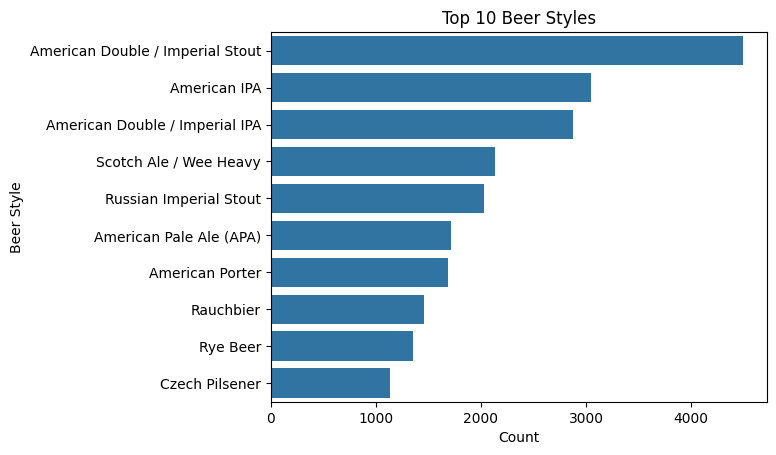

In [10]:
# Top 10 beer styles
top_styles = data['beer/style'].value_counts().nlargest(10)
sns.barplot(x=top_styles.values, y=top_styles.index)
plt.title("Top 10 Beer Styles")
plt.xlabel("Count")
plt.ylabel("Beer Style")
plt.show()


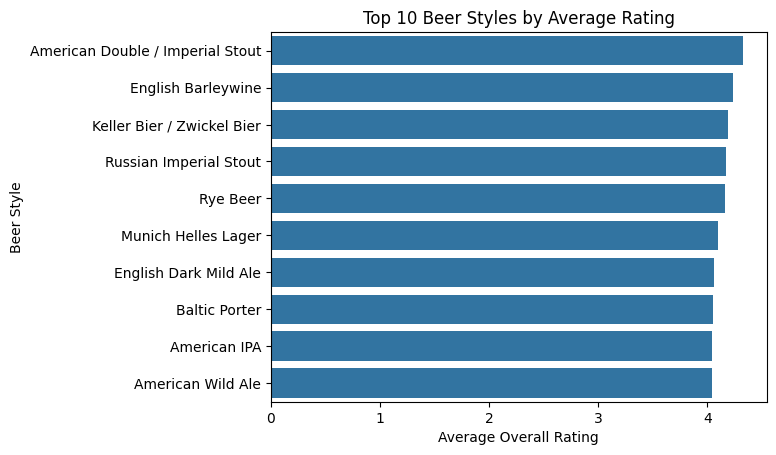

In [9]:
avg_rating_style = data.groupby('beer/style')['review/overall'].mean().nlargest(10)
sns.barplot(x=avg_rating_style.values, y=avg_rating_style.index)
plt.title("Top 10 Beer Styles by Average Rating")
plt.xlabel("Average Overall Rating")
plt.ylabel("Beer Style")
plt.show()


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, f1_score
from datetime import datetime
from nltk.corpus import stopwords
import re
import nltk

# Download NLTK data for stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
# Load the dataset
data = pd.read_csv('/content/train.csv')

# Display the first few rows
data.head()


,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [15]:
# Fill missing values with appropriate strategies
data['user/gender'].fillna('Unknown', inplace=True)
data['user/birthdayRaw'].fillna('Unknown', inplace=True)
data['review/text'].fillna('', inplace=True)


<ipython-input-15-181b44910010>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['user/gender'].fillna('Unknown', inplace=True)
<ipython-input-15-181b44910010>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [16]:
# Extract year from review/timeUnix and calculate user age
def extract_year(unix_time):
    return datetime.utcfromtimestamp(unix_time).year

data['review_year'] = data['review/timeUnix'].apply(extract_year)

# Calculate user age if birthday is provided
def calculate_age(birthday):
    try:
        birth_year = int(birthday.split('-')[-1])
        return datetime.now().year - birth_year
    except:
        return np.nan

data['user_age'] = data['user/birthdayRaw'].apply(calculate_age)
data['user_age'].fillna(data['user_age'].mean(), inplace=True)  # Impute missing ages


<ipython-input-16-ebeeb8dc0fac>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['user_age'].fillna(data['user_age'].mean(), inplace=True)  # Impute missing ages


In [17]:
# Encode categorical columns like beer/name and beer/style
le = LabelEncoder()
data['beer/style'] = le.fit_transform(data['beer/style'])
data['beer/name'] = le.fit_transform(data['beer/name'])
data['user/gender'] = le.fit_transform(data['user/gender'])


In [18]:
# Clean and preprocess text in review/text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Lowercase and remove punctuation
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

data['cleaned_review_text'] = data['review/text'].apply(preprocess_text)


In [19]:
# Convert review text to TF-IDF features
tfidf = TfidfVectorizer(max_features=100)  # Set max_features based on your requirements
tfidf_matrix = tfidf.fit_transform(data['cleaned_review_text']).toarray()
tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf.get_feature_names_out())
data = pd.concat([data.reset_index(drop=True), tfidf_df], axis=1)


In [20]:
# Calculate average rating from individual scores
data['average_rating'] = data[['review/appearance', 'review/aroma', 'review/palate', 'review/taste']].mean(axis=1)


In [21]:
# Select features for modeling
features = ['beer/style', 'beer/ABV', 'average_rating', 'user_age'] + list(tfidf_df.columns)
X = data[features]
y = data['review/overall']  # Target variable


In [22]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [24]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.32299550476190475
Root Mean Squared Error (RMSE): 0.42462600590787286
R-squared (R2): 0.6334604588054353
